In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results

# Partie 1 : Inspection des données & Nettoyages des données

<span style="color: #008080">@ Télécharger les fichiers de format csv et puis les palcent dans des dataframes nommés séparemment `loandown_2015` et `loandown_2016`. Les colonnes du fichier sont uniquement séparées par le virgule `,`. </span> 

In [2]:
loandown_2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=',',low_memory=False)
loandown_2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=',',low_memory=False)

<span style="color: #008080"> @ On afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées dans le dataframe `loandown_2015` et le dataframe `loandown_2016`et leurs tailles. </span>

In [3]:
print("La taille du dataframe est : ", loandown_2015.shape)
loandown_2015.head();

La taille du dataframe est :  (3340, 47)


In [4]:
print("La taille du dataframe est : ", loandown_2016.shape)
loandown_2016.head()

La taille du dataframe est :  (3376, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


<span style="color: #008080"> @ Nettoytage : On sépare la variable `Location` de `loandown_2015` en trois nouveaux colonnes : `Latitude, Longitude, Human_adress`.</span>

In [5]:
loandown_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [6]:
import json
import ast


data_2015= pd.DataFrame()
for idx, row in loandown_2015.iterrows():

    data_dict = ast.literal_eval(row['Location'])
    lat = data_dict['latitude']
    lon = data_dict['longitude']
    human_address = data_dict['human_address'] 

    normalize = pd.Series(json.loads(data_dict['human_address']))
    row = row.drop('Location')

    cols = list(row.index) + ['Latitude', 'Longitude', 'Human_adress'] + list(normalize.index)
    temp_df = pd.DataFrame([list(row) + [lat, lon, human_address] + list(normalize)], columns = cols )
    data_2015 = data_2015.append(temp_df).reset_index(drop=True)

In [7]:
data_2015.shape

(3340, 53)

<span style="color: #008080"> @ Nettoyage : On s'intéresse de près aux émmisions des bâtiments non destinés à l'habitation: `NON RESIDENTIEL` 
- On stock ces bâtiments dans un dataframe, on le nomme `data_2015`.</span>

In [8]:
data_2015['BuildingType'].value_counts()

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

In [9]:
data_2015.loc[data_2015['BuildingType']=='SPS-District K-12']['PrimaryPropertyType'].value_counts()

K-12 School          93
SPS-District K-12     4
Other                 2
Name: PrimaryPropertyType, dtype: int64

In [10]:
data_2015.loc[data_2015['BuildingType']=='Nonresidential COS']['PrimaryPropertyType'].value_counts()

Other                          48
Non-Refrigerated Warehouse      6
Small- and Mid-Sized Office     4
Mixed Use Property              4
Large Office                    3
Distribution Center\n           2
Medical Office                  1
Name: PrimaryPropertyType, dtype: int64

In [11]:
data_2015=data_2015.loc[data_2015['BuildingType'].isin({'NonResidential','SPS-District K-12','Nonresidential COS'})] 

In [12]:
data_2015.shape

(1628, 53)

<span style="color: #008080"> @ Nettoyage : On s'intéresse de près aux émmisions des bâtiments non destinés à l'habitation: `NON RESIDENTIEL` 
- On stock ces bâtiments dans un dataframe, on le nomme `data_2016`.</span>

In [13]:
loandown_2016['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [14]:
data_2016=loandown_2016.loc[loandown_2016['BuildingType'].isin({'NonResidential','SPS-District K-12','Nonresidential COS','Nonresidential WA'})] 
data_2016.shape

(1644, 46)

<span style="color: #008080"> @ Nettoyage : On supprime les lignes de valeurs "Low outlier et Hign outlier" dans la variable `Outlier` des datasets `data_2015` et `data_2016`.  </span>

In [15]:
data_2015['Outlier'].value_counts()

Low Outlier     17
High Outlier    14
Name: Outlier, dtype: int64

In [16]:
data_2016['Outlier'].value_counts()

Low outlier     15
High outlier     2
Name: Outlier, dtype: int64

In [17]:
data_2015=data_2015.drop((data_2015.loc[data_2015['Outlier']=='Low Outlier']).index)
data_2015=data_2015.drop((data_2015.loc[data_2015['Outlier']=='High Outlier']).index)
data_2016=data_2016.drop((data_2016.loc[data_2016['Outlier']=='Low outlier']).index)
data_2016=data_2016.drop((data_2016.loc[data_2016['Outlier']=='High outlier']).index)

<span style="color: #FF00FF">  @ Filtrage : On choisit les variables ce qui nous s'intéresse pour prédir `les émissions de CO²` et `la consommation total d'énergie`.
- Définiton des variables : https://www.opendatanetwork.com/dataset/data.seattle.gov/2bpz-gwpy

- BuildingType : Types de bâtiment.                  
- ListOfAllPropertyUseTypes : Toutes les utilisations de la propriété.
- YearBuilt : Année de construction.                     
- NumberofBuildings : Nombre de bâtiments.               
- NumberofFloors : Nombre d'étages.                  
- TaxParcelIdentificationNumber : Numéro d'identification de la parcelle fiscale (Code PIN du comté de King).
- CouncilDistrictCode : Code de discrict.           
- Neighborhood : Quartier                  
- Latitude                      
- Longitude                     
- PropertyGFATotal : la superficie totale du bâtiment et du stationnement.             
- PropertyGFAParking : Espace total de tous types de stationnements.
- PropertyGFABuilding(s) : Espace total de bâtiment. 
- GHGEmissions(MetricTonsCO2e) : La quantité totale démissions de gaz.   
- ENERGYSTARScore                
- SiteEnergyUse(kBtu): La quantité annuelle d'énergie consommée par la propriété.        
- SteamUse(kBtu) : La quantité annuelle de vapeur consommée par la propriété.        
- Electricity(kBtu) :La quantité annuelle d'électricité consommée par la propriété.        
- NaturalGas(kBtu) : La quantité annuelle de gaz naturelle consommée par la propriété.        
- OtherFuelUse(kBtu) : La quantité annuelle d'autre fuel consommé par la propriété. 
- kBtu : en millier d'unités thermiques britaniques.       
</span>

In [18]:
data_2015['ENERGYSTARScore']

0       65.0
1       51.0
2       18.0
4       67.0
5        NaN
        ... 
3313     NaN
3314    99.0
3319     NaN
3322     NaN
3334    84.0
Name: ENERGYSTARScore, Length: 1597, dtype: float64

In [19]:
data_2015.value_counts()

Series([], dtype: int64)

In [20]:
data_2015=data_2015[[ 
    'BuildingType',
    'ListOfAllPropertyUseTypes',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'TaxParcelIdentificationNumber',
    'CouncilDistrictCode',
    'Neighborhood',
    'Latitude',
    'Longitude',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'GHGEmissions(MetricTonsCO2e)',
    'ENERGYSTARScore',
    'SiteEnergyUse(kBtu)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)',
    'OtherFuelUse(kBtu)']] 

In [21]:
data_2016=data_2016.rename(columns={'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)'})

In [22]:
data_2016=data_2016[[ 
    'BuildingType',
    'ListOfAllPropertyUseTypes',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'TaxParcelIdentificationNumber',
    'CouncilDistrictCode',
    'Neighborhood',
    'Latitude',
    'Longitude',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'GHGEmissions(MetricTonsCO2e)',
    'ENERGYSTARScore',
    'SiteEnergyUse(kBtu)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)']] 

<span style="color: #008080"> @ Création du DataFrame de données
-
- On fusionne les deux datasets `data_2015` et `data_2016` et les assigne à `data`.</span>

In [23]:
frames =[data_2015,data_2016] 
data = pd.concat(frames, ignore_index=True)
print(data.shape)

(3224, 20)


In [24]:
data.columns

Index(['BuildingType', 'ListOfAllPropertyUseTypes', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'GHGEmissions(MetricTonsCO2e)', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)'],
      dtype='object')

<span style="color: #008080"> @ Pré-traitement des données
-
- On transforme les varaibles `SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu) et OtherFuelUse(kBtu)` en pourcentage. Puit on change les noms de ces variables.</span>

In [25]:
data['SteamUse(kBtu)']=data['SteamUse(kBtu)']/data['SiteEnergyUse(kBtu)']
data['Electricity(kBtu)'] = data['Electricity(kBtu)']/data['SiteEnergyUse(kBtu)']
data['NaturalGas(kBtu)'] = data['NaturalGas(kBtu)']/data['SiteEnergyUse(kBtu)']
data['OtherFuelUse(kBtu)'] = data['OtherFuelUse(kBtu)']/data['SiteEnergyUse(kBtu)']

In [26]:
data=data.rename(columns={'SteamUse(kBtu)': 'SteamUse(percentage)','Electricity(kBtu)':'Electricity(percentage)','NaturalGas(kBtu)':'NaturalGas(percentage)','OtherFuelUse(kBtu)':'OtherFuelUse(percentage)'})

In [27]:
data.sample(5)

,BuildingType,ListOfAllPropertyUseTypes,YearBuilt,NumberofBuildings,NumberofFloors,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),GHGEmissions(MetricTonsCO2e),ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(percentage),Electricity(percentage),NaturalGas(percentage),OtherFuelUse(percentage)
1670,Nonresidential COS,Other,1928,1.0,2.0,1988200700,7,MAGNOLIA / QUEEN ANNE,47.62395,-122.35143,262048,0,262048,490.73,NaN,20723248.00,0.247896,0.652054,0.000000,NaN
1702,SPS-District K-12,K-12 School,2008,1.0,3.0,6840701230,3,CENTRAL,47.60598,-122.30156,254523,0,254523,359.09,60.0,13567774.00,0.000000,0.577476,0.422524,NaN
2282,NonResidential,Worship Facility,1928,1.0,2.0,0850000300,6,Northwest,47.66476,-122.35248,45991,0,45991,36.43,77.0,1145535.75,0.000000,0.461818,0.538182,NaN
2446,NonResidential,"Office, Parking",1985,1.0,5.0,1989200945,7,MAGNOLIA / QUEEN ANNE,47.6189,-122.35713,85963,33055,52908,31.24,43.0,4480961.00,0.000000,1.000000,0.000000,NaN
1388,NonResidential,"Food Service, Library, Office, Parking",1997,1.0,3.0,4083300310,4,LAKE UNION,47.66117154,-122.3389096,31686,7358,24328,14.30,46.0,2051501.00,0.000000,1.000041,0.000000,0.0


<span style="color: #008080"> @ Afficher le taux des valeurs  manquantes de chaque variable: </span>

In [28]:
data.isna().mean();

<span style="color: #008080"> @ NAN : Remplacer les valeurs manquantede de la colonne `OtherFuelUse(percentage)` par `0`.  </span>

In [29]:
data.loc[data['OtherFuelUse(percentage)'].isna()]=0

In [30]:
data.isna().mean()

BuildingType                     0.000000
ListOfAllPropertyUseTypes        0.018921
YearBuilt                        0.000000
NumberofBuildings                0.000000
NumberofFloors                   0.002171
TaxParcelIdentificationNumber    0.000310
CouncilDistrictCode              0.000000
Neighborhood                     0.000000
Latitude                         0.000000
Longitude                        0.000000
PropertyGFATotal                 0.000000
PropertyGFAParking               0.000000
PropertyGFABuilding(s)           0.000000
GHGEmissions(MetricTonsCO2e)     0.000000
ENERGYSTARScore                  0.155707
SiteEnergyUse(kBtu)              0.000000
SteamUse(percentage)             0.000000
Electricity(percentage)          0.000000
NaturalGas(percentage)           0.000000
OtherFuelUse(percentage)         0.000000
dtype: float64

<span style="color: #008080"> @ NANs : On supprimer  toutes les lignes qui ne contient que les Nan dans la colonne `ENERGYSTARScore`, `ListOfAllPropertyUseTypes` et `NumberofFloors`. </span>

In [31]:
line_with_nan = ['ENERGYSTARScore','ListOfAllPropertyUseTypes','NumberofFloors']

for col in line_with_nan:
    index_with_nan = data.index[data[col].isnull()]
    data.drop(index_with_nan,axis=0, inplace=True);
    print("La taille de dataset data :", data.shape)

La taille de dataset data : (2722, 20)
La taille de dataset data : (2675, 20)
La taille de dataset data : (2672, 20)


<span style="color: #008080"> @ Convertir : On convetit la variable catégorielle `CouncilDistrictCode` en variables indicatrices.</span>

In [32]:
data = pd.get_dummies(data, columns=['CouncilDistrictCode'],drop_first= True)

In [33]:
data.head()

,BuildingType,ListOfAllPropertyUseTypes,YearBuilt,NumberofBuildings,NumberofFloors,TaxParcelIdentificationNumber,Neighborhood,Latitude,Longitude,PropertyGFATotal,...,Electricity(percentage),NaturalGas(percentage),OtherFuelUse(percentage),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
0,NonResidential,Hotel,1927,1.0,12.0,659000030,DOWNTOWN,47.61219025,-122.33799744,88434,...,0.527995,0.182253,0.0,0,0,0,0,0,0,1
1,NonResidential,"Hotel, Parking, Restaurant",1996,1.0,11.0,659000220,DOWNTOWN,47.61310583,-122.33335756,103566,...,0.467477,0.532542,0.0,0,0,0,0,0,0,1
2,NonResidential,"Hotel, Parking, Swimming Pool",1969,1.0,41.0,659000475,DOWNTOWN,47.61334897,-122.33769944,961990,...,0.680459,0.050730,0.0,0,0,0,0,0,0,1
3,NonResidential,"Hotel, Parking, Swimming Pool",1980,1.0,18.0,659000970,DOWNTOWN,47.6137544,-122.3409238,119890,...,0.409077,0.590940,0.0,0,0,0,0,0,0,1
5,NonResidential,Hotel,1926,1.0,11.0,660000825,DOWNTOWN,47.6141141,-122.33274086,83008,...,0.428557,0.571461,0.0,0,0,0,0,0,0,1


<span style="color: #008080"> @ Nettoyage des données : On supprime les lignes qui ont des valeurs abérrantes : dans les colonnes `PropertyGFAParking`et `PropertyGFABuilding(s)`.
</span>

In [34]:
data.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),GHGEmissions(MetricTonsCO2e),ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(percentage),Electricity(percentage),NaturalGas(percentage),OtherFuelUse(percentage),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
count,2672.000000,2672.000000,2672.000000,2.672000e+03,2672.000000,2.672000e+03,2672.000000,2672.000000,2.672000e+03,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,762.757111,0.388847,1.866392,4.806501e+04,5970.916542,4.209409e+04,63.111759,25.102919,2.986405e+06,0.007358,0.280287,0.100897,0.000103,0.029566,0.089446,0.042665,0.039296,0.032934,0.029192,0.125374
std,957.386850,0.488347,5.436861,1.417564e+05,30037.221422,1.224871e+05,401.562996,35.939936,1.346802e+07,0.053208,0.386898,0.205405,0.003200,0.169418,0.285440,0.202138,0.194336,0.178498,0.168375,0.331205
min,0.000000,0.000000,0.000000,0.000000e+00,-2.000000,-4.331000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1956.250000,1.000000,2.000000,4.002825e+04,0.000000,3.840975e+04,30.600000,59.000000,1.786176e+06,0.000000,0.607166,0.037379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,2.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,11824.890000,100.000000,2.958126e+08,0.684985,1.000044,0.994719,0.123992,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
index_with_aberrant = data.index[data['PropertyGFAParking']==-2]
data.drop(index_with_aberrant,0, inplace=True)
index_with_aberrant = data.index[data['PropertyGFABuilding(s)']==-43310]
data.drop(index_with_aberrant,0, inplace=True)
data.describe()

/tmp/ipykernel_30528/1738705438.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(index_with_aberrant,0, inplace=True)
/tmp/ipykernel_30528/1738705438.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(index_with_aberrant,0, inplace=True)


,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),GHGEmissions(MetricTonsCO2e),ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(percentage),Electricity(percentage),NaturalGas(percentage),OtherFuelUse(percentage),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
count,2670.000000,2670.000000,2670.000000,2.670000e+03,2670.000000,2.670000e+03,2670.000000,2670.000000,2.670000e+03,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000
mean,761.837079,0.388390,1.861798,4.805514e+04,5938.938577,4.211620e+04,63.140427,25.067041,2.985973e+06,0.007364,0.279748,0.100973,0.000103,0.029588,0.089139,0.042697,0.039326,0.032959,0.029213,0.125094
std,957.154673,0.488243,5.435683,1.418089e+05,29996.158309,1.225207e+05,401.712054,35.928799,1.347305e+07,0.053228,0.386541,0.205463,0.003201,0.169480,0.284997,0.202210,0.194405,0.178562,0.168436,0.330887
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1956.000000,1.000000,2.000000,3.999600e+04,0.000000,3.840125e+04,30.660000,59.000000,1.779267e+06,0.000000,0.606826,0.038075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,2.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,11824.890000,100.000000,2.958126e+08,0.684985,1.000044,0.994719,0.123992,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style="color: #008080"> @ Nettoyage des données : Supprimer les lignes ne contient que les 0 :
</span>

In [36]:
features_numeriques = [ 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'GHGEmissions(MetricTonsCO2e)', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(percentage)',
       'Electricity(percentage)', 'NaturalGas(percentage)',
       'OtherFuelUse(percentage)']
ligne_nulle= data[features_numeriques]

In [37]:
index_0= np.where(~ligne_nulle.any(axis=1))[0]
print(len(index_0))
index_0

1634


array([  27,  401,  470, ..., 2667, 2668, 2669])

In [38]:
# Afficher tous les lignes ayant que les zéros
data.iloc[index_0, :]

,BuildingType,ListOfAllPropertyUseTypes,YearBuilt,NumberofBuildings,NumberofFloors,TaxParcelIdentificationNumber,Neighborhood,Latitude,Longitude,PropertyGFATotal,...,Electricity(percentage),NaturalGas(percentage),OtherFuelUse(percentage),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
42,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
543,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
640,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
911,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1189,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3220,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3221,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3222,0,0,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [39]:
index_0 = data.iloc[index_0, :].index
data.drop(index_0, axis=0, inplace= True)

In [40]:
data.shape

(1036, 26)

# Partie 2 : Analyse exploratoire des données

<span style="color: #008080"> Unidimensionnelle
-
- Distribution de la variable cible : `SiteEnergyUse(kBtu)` et `GHGEmissions(MetricTonsCO2e)`
 </span>

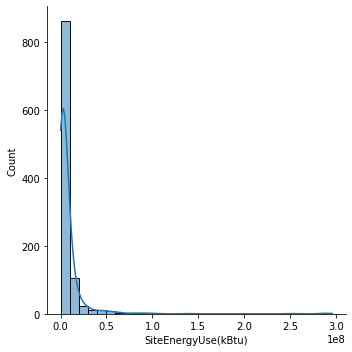

In [41]:
sns.displot(data=data,x='SiteEnergyUse(kBtu)', bins=30,kde=True);

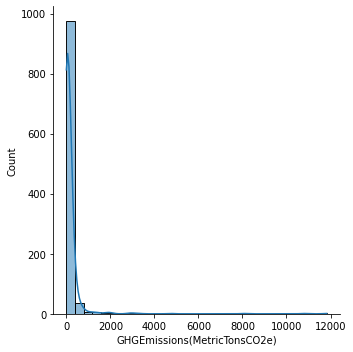

In [42]:
sns.displot(data=data,x='GHGEmissions(MetricTonsCO2e)', bins=30,kde=True);

<span style="color: #008080"> @ On applique une échelle logarithmique aux targets : `SiteEnergyUse(kBtu)` et `GHGEmissions(MetricTonsCO2e)`. </span>

In [43]:
from math import sqrt, log
data['LGHGEmissions(MetricTonsCO2e)'] = data['GHGEmissions(MetricTonsCO2e)'].map(lambda x: log(x+1))
data['LSiteEnergyUse(kBtu)'] = data['SiteEnergyUse(kBtu)'].map(lambda x: log(x+1))
del data['GHGEmissions(MetricTonsCO2e)']
del data['SiteEnergyUse(kBtu)']

In [44]:
targets = data[['LSiteEnergyUse(kBtu)','LGHGEmissions(MetricTonsCO2e)']]

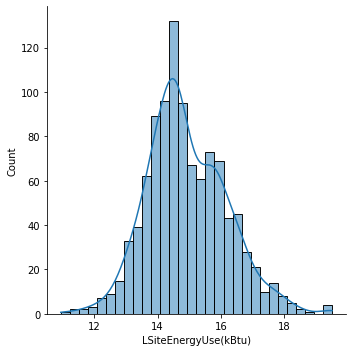

In [45]:
sns.displot(data=data,x='LSiteEnergyUse(kBtu)', bins=30,kde=True);

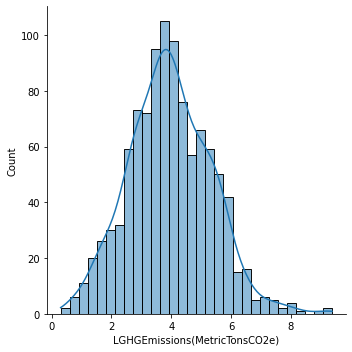

In [46]:
sns.displot(data=data,x='LGHGEmissions(MetricTonsCO2e)', bins=30,kde=True);

<span>  On liste toutes les variables que l'on va utliser dans les modèles, dans une liste `features_usefuls`.

In [47]:
features_usefuls = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors',        
                    'Latitude', 'Longitude', 'PropertyGFATotal',
                    'PropertyGFAParking', 'PropertyGFABuilding(s)',
                    'ENERGYSTARScore',
                    'SteamUse(percentage)','Electricity(percentage)', 
                    'NaturalGas(percentage)','OtherFuelUse(percentage)', 
                    'CouncilDistrictCode_1', 'CouncilDistrictCode_2', 
                    'CouncilDistrictCode_3', 'CouncilDistrictCode_4', 
                    'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
                    'CouncilDistrictCode_7']

<span style="color: #008080"> @ `Standardiser` les données : On met les données à la même échelle avant d'appliquer le transformer `VarianceThreshold`  : </span>

In [48]:
data[features_usefuls]

,YearBuilt,NumberofBuildings,NumberofFloors,Latitude,Longitude,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SteamUse(percentage),Electricity(percentage),NaturalGas(percentage),OtherFuelUse(percentage),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
0,1927,1.0,12.0,47.61219025,-122.33799744,88434,0,88434,65.0,0.289773,0.527995,0.182253,0.0,0,0,0,0,0,0,1
1,1996,1.0,11.0,47.61310583,-122.33335756,103566,15064,88502,51.0,0.000000,0.467477,0.532542,0.0,0,0,0,0,0,0,1
2,1969,1.0,41.0,47.61334897,-122.33769944,961990,0,961990,18.0,0.268839,0.680459,0.050730,0.0,0,0,0,0,0,0,1
3,1980,1.0,18.0,47.6137544,-122.3409238,119890,12460,107430,67.0,0.000000,0.409077,0.590940,0.0,0,0,0,0,0,0,1
5,1926,1.0,11.0,47.6141141,-122.33274086,83008,0,83008,25.0,0.000000,0.428557,0.571461,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,2014,1.0,2.0,47.731823,-122.3262515,48925,0,48925,72.0,0.000000,0.650806,0.349220,0.0,0,0,0,0,1,0,0
1579,2014,1.0,2.0,47.61403196,-122.32659794,35780,0,35780,67.0,0.000000,0.665664,0.334363,0.0,0,0,1,0,0,0,0
1590,2010,1.0,8.0,47.67057565,-122.3866853,41198,0,41198,64.0,0.000000,0.913945,0.086093,0.0,0,0,0,0,0,1,0
1593,2014,1.0,6.0,47.6233466,-122.33968176,427181,169195,257986,99.0,0.000000,0.878201,0.121836,0.0,0,0,0,0,0,0,1


In [49]:
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler()  
std_scaler.fit(data[features_usefuls])  
 
data[features_usefuls] = std_scaler.transform(data[features_usefuls])  

In [50]:
data.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,Latitude,Longitude,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SteamUse(percentage),...,OtherFuelUse(percentage),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,LGHGEmissions(MetricTonsCO2e),LSiteEnergyUse(kBtu)
count,1.036000e+03,1.036000e+03,1036.000000,1.036000e+03,1.036000e+03,1036.000000,1.036000e+03,1036.000000,1.036000e+03,1.036000e+03,...,1.036000e+03,1.036000e+03,1.036000e+03,1.036000e+03,1.036000e+03,1.036000e+03,1.036000e+03,1036.000000,1036.000000,1036.000000
mean,-3.429260e-17,1.851801e-15,0.000000,-8.787822e-14,5.839070e-13,0.000000,-4.115112e-17,0.000000,-1.234534e-16,7.544373e-17,...,-3.429260e-18,-5.486816e-17,-2.743408e-17,6.858521e-17,2.057556e-17,6.858521e-18,-5.829743e-17,0.000000,3.953720,14.921399
std,1.000483e+00,1.000483e+00,1.000483,1.000483e+00,1.000483e+00,1.000483,1.000483e+00,1.000483,1.000483e+00,1.000483e+00,...,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483,1.378218,1.251993
min,-2.000109e+00,-3.108349e-02,-0.609234,-2.148240e+00,-3.183945e+00,-0.504209,-3.282194e-01,-0.520599,-2.289931e+00,-2.255755e-01,...,-5.185123e-02,-2.873145e-01,-5.461187e-01,-3.516308e-01,-3.358302e-01,-3.046752e-01,-2.853412e-01,-0.689771,0.300105,10.941890
25%,-8.017180e-01,-3.108349e-02,-0.482264,-6.518897e-01,-4.174337e-01,-0.444058,-3.282194e-01,-0.438120,-5.977738e-01,-2.255755e-01,...,-5.185123e-02,-2.873145e-01,-5.461187e-01,-3.516308e-01,-3.358302e-01,-3.046752e-01,-2.853412e-01,-0.689771,3.021759,14.056746
50%,1.443805e-01,-3.108349e-02,-0.228325,-7.508576e-02,-5.118500e-03,-0.340175,-3.282194e-01,-0.322254,2.663066e-01,-2.255755e-01,...,-5.185123e-02,-2.873145e-01,-5.461187e-01,-3.516308e-01,-3.358302e-01,-3.046752e-01,-2.853412e-01,-0.689771,3.888651,14.736884
75%,8.066494e-01,-3.108349e-02,0.025615,6.891530e-01,4.366583e-01,-0.016356,-3.282194e-01,-0.024503,8.423602e-01,-2.255755e-01,...,-5.185123e-02,-2.873145e-01,-5.461187e-01,-3.516308e-01,-3.358302e-01,-3.046752e-01,-2.853412e-01,1.449757,4.893202,15.760802
max,1.595065e+00,3.217142e+01,11.960762,2.372013e+00,3.024214e+00,8.877166,1.066410e+01,9.344048,1.274400e+00,7.915974e+00,...,2.409733e+01,3.480506e+00,1.831104e+00,2.843892e+00,2.977695e+00,3.282183e+00,3.504576e+00,1.449757,9.378046,19.505237


@ Matrice de corrélation
-
- Pour entraîner un modèle de régression linéaire, nous sélectionnons les features qui ont une corrélation importante avec nos variables cibles `LGHGEmissions(MetricTonsCO2e)` et `LSiteEnergyUse(kBtu)`.

<AxesSubplot:>

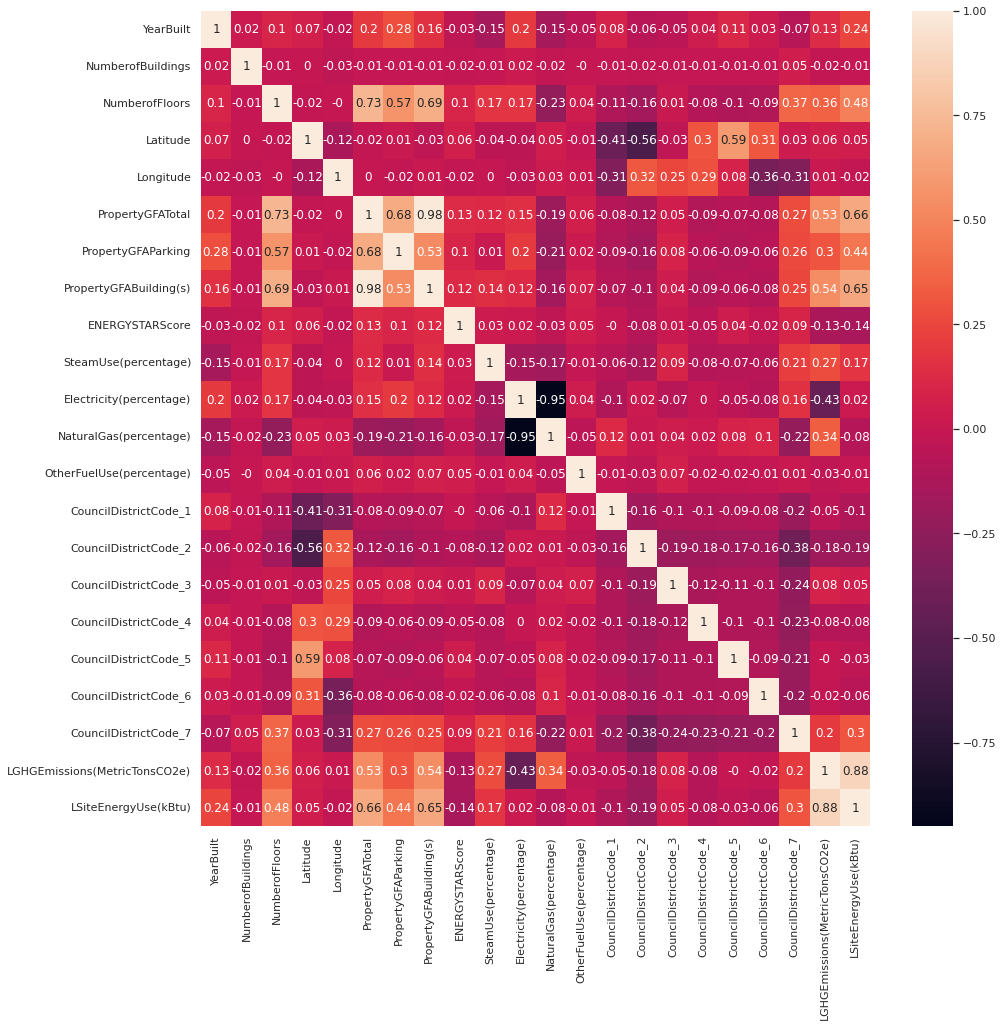

In [51]:
sns.set(rc = {'figure.figsize':(15,15)})
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<span style="color: #008080"> @ `VarianceThreshold` : On applique le transformer `VarianceThreshold` qui nous permet de choisir les variables performentes : </span>

In [52]:
from sklearn.feature_selection import VarianceThreshold
data.var(axis=0);

/tmp/ipykernel_30528/3448418337.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var(axis=0);


In [53]:
from sklearn.feature_selection import VarianceThreshold
seloctor = VarianceThreshold()
seloctor.fit_transform(data[features_usefuls].values).shape
feature_threshold = np.array(features_usefuls)[seloctor.get_support()]
feature_threshold

array(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'Latitude',
       'Longitude', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ENERGYSTARScore',
       'SteamUse(percentage)', 'Electricity(percentage)',
       'NaturalGas(percentage)', 'OtherFuelUse(percentage)',
       'CouncilDistrictCode_1', 'CouncilDistrictCode_2',
       'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
       'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
       'CouncilDistrictCode_7'], dtype='<U24')

# Partie 3 : Préparation des variables pour le modèle

<span style="color: #008080"> @ Création des variables X et y. </span>

In [54]:
y_co2 = data['LGHGEmissions(MetricTonsCO2e)']
y_energy = data['LSiteEnergyUse(kBtu)']

In [55]:
X_co2 = data[['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 
              'Latitude', 'Longitude', 
              'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 
              'ENERGYSTARScore',
              'SteamUse(percentage)', 'Electricity(percentage)',
              'NaturalGas(percentage)', 'OtherFuelUse(percentage)',
              'CouncilDistrictCode_1', 'CouncilDistrictCode_2',
              'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
              'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
              'CouncilDistrictCode_7']]   


In [56]:
X_energy = data[['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 
              'Latitude', 'Longitude', 
              'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
              
              'SteamUse(percentage)', 'Electricity(percentage)',
              'NaturalGas(percentage)', 'OtherFuelUse(percentage)',
              'CouncilDistrictCode_1', 'CouncilDistrictCode_2',
              'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
              'CouncilDistrictCode_5', 'CouncilDistrictCode_6',
              'CouncilDistrictCode_7']]